#Table Extractor from PDF

In [5]:
# camelot -  Extract table from pdf
# shebang -data visualization

#Other PDF extraction lib.:
#tabula  
#pdfplumber 
#pdftable 
#pdf-table-extract 

In [6]:
#https://camelot-py.readthedocs.io/en/master/

In [7]:
pip install camelot-py

     |████████████████████████████████| 40 kB 23 kB/s 
     |████████████████████████████████| 77 kB 3.3 MB/s 
     |████████████████████████████████| 5.6 MB 38.3 MB/s 
     |████████████████████████████████| 3.5 MB 43.3 MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61101 sha256=39312e61957721ab0cf50d781ea28e8bd59862b89c0e3d73aef66537cd8f715c
  Stored in directory: /root/.cache/pip/wheels/80/1a/24/648467ade3a77ed20f35cfd2badd32134e96dd25ca811e64b3
Successfully built PyPDF2


In [8]:
import camelot as cm

In [9]:
#input_pdf = cm.read_pdf("https://www.undp.org/content/dam/india/docs/india_factsheet_economic_n_hdi.pdf",flavor='stream')
#"stream", "lattice"

In [10]:
input_pdf = cm.read_pdf("india_factsheet_economic_n_hdi.pdf",flavor='stream',pages='1,2')
input_pdf

<TableList n=4>

In [11]:
for n in input_pdf:
    print(n)

<Table shape=(35, 4)>
<Table shape=(22, 4)>
<Table shape=(16, 4)>
<Table shape=(26, 2)>


In [12]:
input_pdf[1].df

,0,1,2,3
0,8,GNI per capita (current international $),2280,3550
1,,,2005-06,2009-10
2,9,GDP Growth Rate (%),9.5,8.0
3,,,2004-05,2009-10
4,10,Worker Population Ratio Male (usual principal ...,53.6,53.8
5,11,Worker Population Ratio Rate Female (usual pri...,21.5,18.0
6,,,2005,2010
7,12,"Inflation, Consumer Prices (annual %)",4.25,11.99
8,,Human Development Indicators,2000,2011
9,13,Human Development Index Value (HDI),0.461,0.547


In [13]:
df = input_pdf[1].df.loc[19:21,1:3]
df

,1,2,3
19,Literacy Rate (%),64.8,74.04
20,Male Literacy Rate (%),75.3,82.14
21,Female Literacy Rate (%),53.7,65.46


In [14]:
df = df.reset_index(drop = True)
df

,1,2,3
0,Literacy Rate (%),64.8,74.04
1,Male Literacy Rate (%),75.3,82.14
2,Female Literacy Rate (%),53.7,65.46


In [15]:
df.columns = ["KPI","2001","2011"]
df

,KPI,2001,2011
0,Literacy Rate (%),64.8,74.04
1,Male Literacy Rate (%),75.3,82.14
2,Female Literacy Rate (%),53.7,65.46


In [16]:
df.loc[:,["2001","2011"]] = df.loc[:,["2001","2011"]].astype(float)
df

,KPI,2001,2011
0,Literacy Rate (%),64.8,74.04
1,Male Literacy Rate (%),75.3,82.14
2,Female Literacy Rate (%),53.7,65.46


In [17]:
df.to_csv("packt_output.csv")

In [18]:
df.to_excel("packt_output_excel.xlsx")

In [19]:
import pandas as pd
import seaborn as sns

In [20]:
df2 = pd.read_csv("packt_output.csv")
df2

,Unnamed: 0,KPI,2001,2011
0,0,Literacy Rate (%),64.8,74.04
1,1,Male Literacy Rate (%),75.3,82.14
2,2,Female Literacy Rate (%),53.7,65.46


In [21]:
df_melted = df.melt('KPI', var_name='year', value_name='percentage')
df_melted

,KPI,year,percentage
0,Literacy Rate (%),2001,64.8
1,Male Literacy Rate (%),2001,75.3
2,Female Literacy Rate (%),2001,53.7
3,Literacy Rate (%),2011,74.04
4,Male Literacy Rate (%),2011,82.14
5,Female Literacy Rate (%),2011,65.46


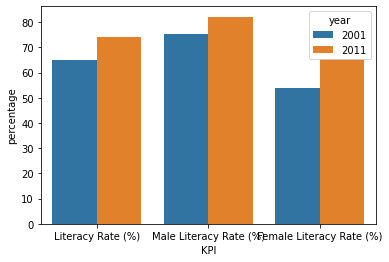

In [22]:
sns.barplot(x = "KPI", y = "percentage", hue = "year", data = df_melted);